In [101]:
# import some stuff heidiho
import sys
import os
sys.path.append(os.path.expanduser('~/PythonModules/Own'))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.constants as cst
import scipy.signal as sig

from plotting import *
%matplotlib inline

set_sns_standard(context='talk', font_scale=2)


# Rubidium
## Single photon transitions

In [102]:
def f_to_lam(f):
    return cst.c/f

def lam_to_f(lam):
    return cst.c/lam

def lam_to_om(lam):
    return cst.c/lam * 2*np.pi

In [103]:
# loading data from files
full_data_array = np.loadtxt("../Data/2016-01-29_776nm_8213A_g1.dat", skiprows=1)

time = full_data_array[:, 1]
t_delay = full_data_array[:,2]*1e-15
analog1 = full_data_array[:,3]
analog3 = full_data_array[:,4]
analog5 = full_data_array[:,5]
analog7 = full_data_array[:,6]

(1e-11, 1.5e-11)

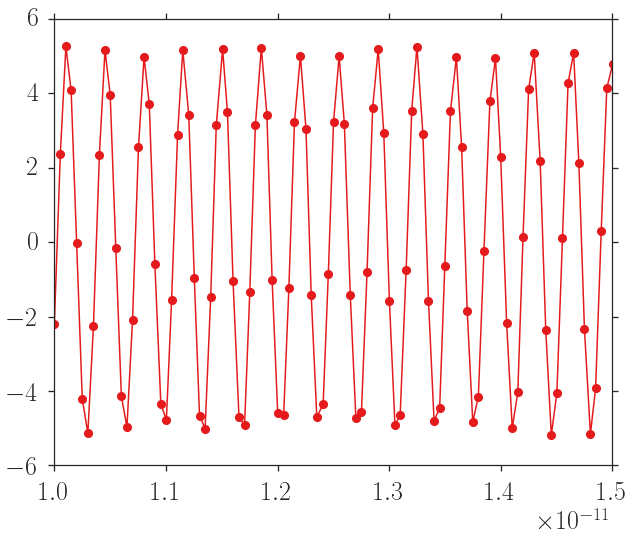

In [104]:
full_signal = analog1 + 1j*analog3


fig = plt.figure(figsize=(10,8))
axe = fig.add_subplot(111)

axe.plot(t_delay, (analog1), '-o')
axe.set_xlim(xmin = 1e-11, xmax = 1.5e-11)
#plt.plot(time,analog3)

5.00068173333e-14
3.84242190135e+14 7.80217440189e-07 7.802414769346965e-07


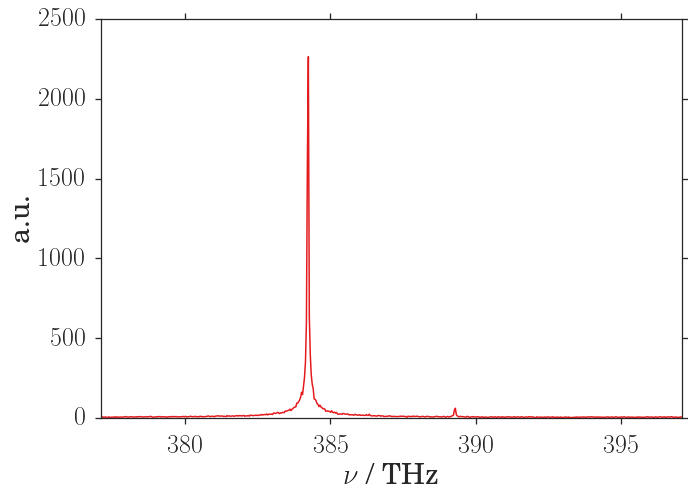

In [109]:
full_signal = analog1 + 1j*analog3

monochromator_frequency = lam_to_f(774.45e-9)

# to get the frequencies, we need to use fftfreq
delta_t = np.mean(np.diff(t_delay))
print(delta_t)
frequencies = np.fft.fftfreq(len(full_signal), delta_t)
frequencies = np.fft.fftshift(frequencies) + monochromator_frequency

# fourier trafo and shifting data to correct sides
ft_full_signal = np.fft.fft(full_signal)
ft_full_signal = np.fft.fftshift(ft_full_signal)
ft_full_signal_abs = abs(ft_full_signal)

wavelengths = f_to_lam(frequencies)

fig = plt.figure()
axe = fig.add_subplot(111)
axe.plot(frequencies/1e12, ft_full_signal_abs)

axe.set_xlim(xmin=min(frequencies/1e12), xmax = max(frequencies/1e12))
axe.set_xlabel(r"$ \nu $ / THz ")
axe.set_ylabel('a.u.')

fig.savefig('../Plots/fft_Rb_1gamma.pdf')

# calculate wavelength of transition
f_max = frequencies[np.argmax(ft_full_signal)]
lam_max = f_to_lam(f_max) #2*np.pi*cst.c/f_max

f_expected = 1/12816.545e2
print(f_max, lam_max, f_expected)

## Two photon transitions

5.00068173333e-14
[  7.68451107e+14   7.70580600e+14   7.71345887e+14   7.78566200e+14]
[  3.90125611e-07   3.89047502e-07   3.88661511e-07   3.85057119e-07]
[  3.89096943e-07   3.89052105e-07]
3.889714156575776e-07
[ 2563276.9818955   2570380.20710247  2572932.92866123  2597017.3016286 ]


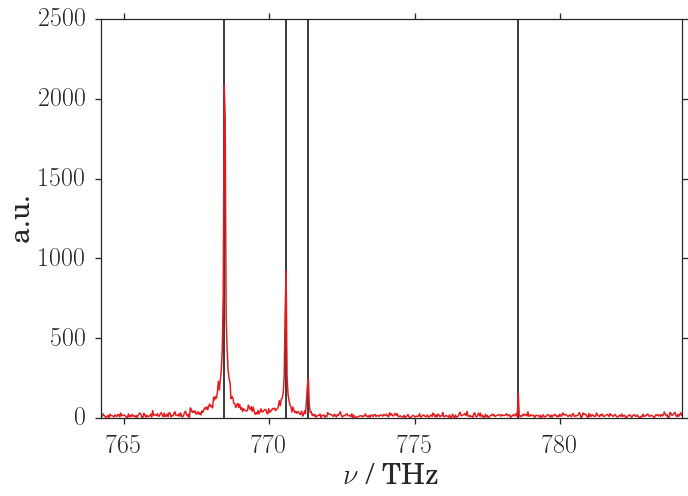

In [123]:
full_signal = analog5 + 1j*analog7

# to get the frequencies, we need to use fftfreq
delta_t = np.mean(np.diff(t_delay))
print(delta_t)
frequencies = np.fft.fftfreq(len(full_signal), delta_t)  + 2 * monochromator_frequency
frequencies = np.fft.fftshift(frequencies)

# fourier trafo and shifting data to correct sides
ft_full_signal = np.fft.fft(full_signal)
ft_full_signal = np.fft.fftshift(ft_full_signal)
ft_full_signal_abs = abs(ft_full_signal)

fig = plt.figure()
axe = fig.add_subplot(111)
axe.plot(frequencies/1e12, ft_full_signal_abs)

axe.set_xlim(xmin=min(frequencies/1e12), xmax = max(frequencies/1e12))
axe.set_xlabel(r"$ \nu $ / THz ")
axe.set_ylabel('a.u.')

fig.savefig('../Plots/fft_Rb_2gamma.pdf')

# obtain local maxima
frequency_maxima_ind = sig.argrelmax(ft_full_signal_abs, order=20)[0]

frequency_maxima_ind = [ind for ind in frequency_maxima_ind if ft_full_signal_abs[ind] > 150]
frequency_maxima = frequencies[frequency_maxima_ind]

wavelength_maxima = f_to_lam(frequency_maxima)
print(frequency_maxima)
print(wavelength_maxima)

axe.vlines(frequency_maxima*1e-12, ymin=0, ymax=2500)

wavelengths_expected = 1/np.array([25700.536e2, 25703.498e2])
print(wavelengths_expected)
print(1/ 25708.83e2)
print(1/wavelength_maxima) # CsII, RbI, CsI ??


# Cesium transitions
## Single photon

5.00012578333e-14
5.1649659656e-06 364564661388980.06


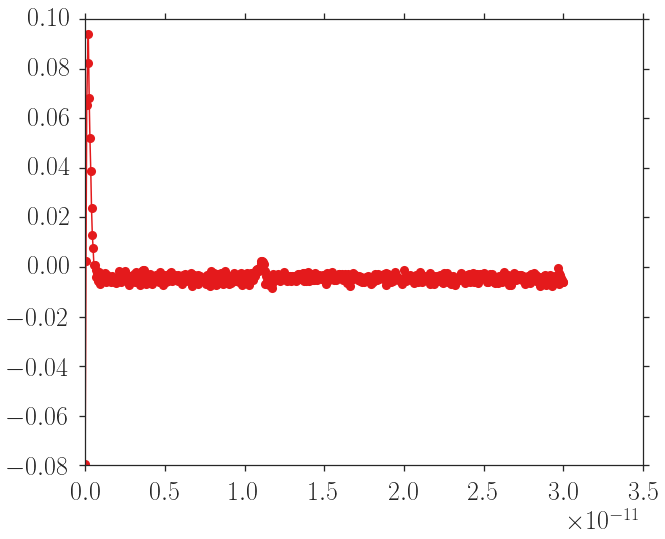

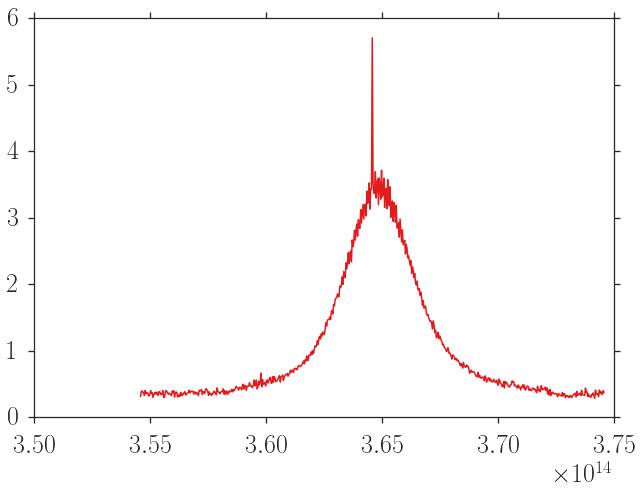

In [107]:
# loading data from files
full_data_array = np.loadtxt("../Data/2016-01-29_822nm_8690A_g1.dat", skiprows=1)

timecs = full_data_array[:, 1]
t_delaycs = full_data_array[:,2]*1e-15
analog1cs = full_data_array[:,3]
analog3cs = full_data_array[:,4]
analog5cs = full_data_array[:,5]
analog7cs = full_data_array[:,6]

monochromator_frequencycs = lam_to_f(822.33e-9)

# reconstructing full signal
full_signalcs = analog1cs + 1j*analog3cs

fig = plt.figure(figsize=(10,8))
axe = fig.add_subplot(111)

axe.plot(t_delaycs, (analog3cs), '-o')
#plt.plot(time,analog3)

# fourier analysis of signal

# to get the frequencies, we need to use fftfreq
delta_tcs = np.mean(np.diff(t_delaycs))
print(delta_tcs)
frequenciescs = np.fft.fftfreq(len(full_signalcs), delta_tcs)
frequenciescs = np.fft.fftshift(frequenciescs) + monochromator_frequencycs

# fourier trafo and shifting data to correct sides
ft_full_signalcs = np.fft.fft(full_signalcs)
ft_full_signalcs = np.fft.fftshift(ft_full_signalcs)

fig2 = plt.figure()
axe2 = fig2.add_subplot(111)

axe2.plot(frequenciescs, abs(ft_full_signalcs))

# calculate wavelength of transition
f_maxcs = frequenciescs[np.argmax(ft_full_signalcs)]
lam_maxcs = 2*np.pi*cst.c/f_maxcs
print(lam_maxcs, monochromator_frequencycs)

## Two photon

5.00012578333e-14
[  7.29229154e+14] [  4.11108712e-07]
4.1123241197013004e-07


3.901261734660681e-07

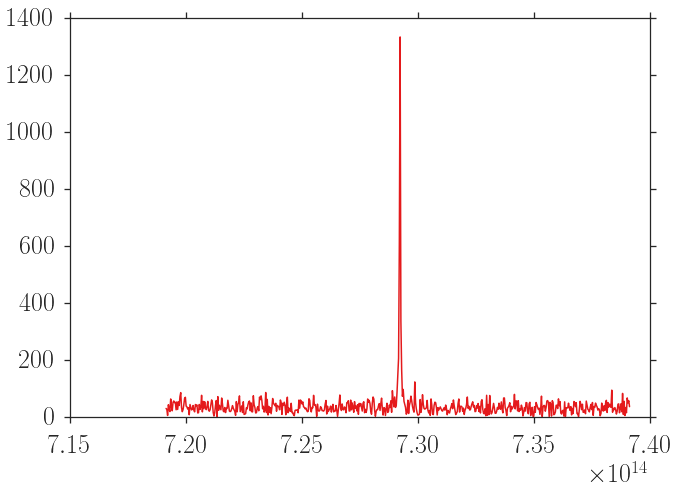

In [119]:
full_signalcs = analog5cs + 1j*analog7cs

# to get the frequencies, we need to use fftfreq
delta_tcs = np.mean(np.diff(t_delaycs))
print(delta_tcs)
frequenciescs = np.fft.fftfreq(len(full_signalcs), delta_tcs)  + 2 * monochromator_frequencycs
frequenciescs = np.fft.fftshift(frequenciescs)

# fourier trafo and shifting data to correct sides
ft_full_signalcs = np.fft.fft(full_signalcs)
ft_full_signalcs = np.fft.fftshift(ft_full_signalcs)

plt.plot(frequenciescs, abs(ft_full_signalcs))
#plt.plot(analog5)
#plt.plot(analog7)
ft_full_signal_abscs = abs(ft_full_signalcs)

# obtain local maxima
frequency_maxima_ind = sig.argrelmax(ft_full_signal_abscs, order=20)[0]

frequency_maxima_ind = [ind for ind in frequency_maxima_ind if ft_full_signal_abscs[ind] > 200]
frequency_maxima = frequenciescs[frequency_maxima_ind]

wavelength_maxima = f_to_lam(frequency_maxima)
print(frequency_maxima,wavelength_maxima)

wavelengths_expected = 1/ 24317.1494e2
print(wavelengths_expected)

cst.c/768.45e12